# Experiments on Baseline model

## Feature extraction

### Image vectorisation
Images are vectorised using the penultimate layer of Keras Xception model <cite data-cite="chollet2017">(Chollet, 2013)</cite> pre-trained on imagenet <cite data-cite="deng2009">(Deng et al., 2009)</cite>.

In [1]:
from src.preprocessing.preprocess_dataset import extract_all
from tensorflow.keras.preprocessing.image import load_img
from os.path import abspath, splitext
from os import listdir
import pandas as pd
import tensorflow_hub as hub
from src.utils.file_utils import save_as_pickle

In [2]:
extract_all("xception", "data/train_images/", "data/features/xception.pkl.train")

/home/lb732/Projects/memotion_analysis/.venv/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
/home/lb732/Projects/memotion_analysis/.venv/lib/python3.6/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [3]:
extract_all("xception", "data/dev_images/", "data/features/xception.pkl.dev")

## Sentences vectorisation
Text of memes are vectorised using pretrained Universal sentence encoding <cite data-cite="cer2018">(Cer et al., 2018)</cite>. The dataset of training is not specified nor open sourced by the authors. 

In [4]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [5]:
def extract_embeddings(model, sents, img_ids, save_file):
    embeddings = model(sents)
    features = {}
    for i, (embed, sent, img_id) in enumerate(zip(embeddings, sents, img_ids)):
        print("{}\t{}\t\t{}".format(i, sent, img_id))
        features[img_id] = embed
    save_as_pickle(features, save_file)

In [6]:
def extract_sentences_and_ids(dataset_path):
    df = pd.read_csv(dataset_path)
    sents = df["Corrected_text"]
    img_ids = df["image_name"].apply(lambda x: splitext(x)[0])
    return sents, img_ids

In [7]:
train_sents, train_img_ids = extract_sentences_and_ids("data/train_text_cleaned_final.csv")
extract_embeddings(use, train_sents, train_img_ids, "data/features/use.pkl.train")

0	LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIKUT TREND PLAY THE 10 YEARS CHALLENGE AT FACEBOOK		10_year_2r94rv
1	The best of #10 YearChallenge! Completed in less the 4 years. Kudus to @narendramodi ji 8:05 PM - 16 Jan 2019 from Mumbai  India		10_year_10-year-challenge_1547788782
2	Sam Thorne @Strippin ( Follow Follow Saw everyone posting these 2009 vs 2019 pics so here's mine 6:23 PM - 12 Jan 2019 O 636 Retweets 3 224 LIKES 65 636		10_year_10yearchallenge-5c75f8b946e0fb0001edc739
3	10 Year Challenge - Sweet Dee Edition		10_year_10-year-challenge-sweet-dee-edition-40184302
4	10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious 10 Year Challenge Memes | What is #10 Year Challenge?		10_year_10-year-challenge-with-no-filter-47-hilarious-10-year-42949168
5	1998: Don't get in car with strangers 2008: Don't meet people from the internet alone.  2019: UBER.. Order yourself a stranger from the internet to get into a car with alone.		10_year_10-years-challenge-about-humanity_o_7260933
6	10 years chal

1151	THE GUY'S NOWHERE TO BE FOUND THEN I HEAR 'PEEK-A-BOO. AND ISHIT YOU NOT. THERE HE WAS DO------ meme memes memeworld drunk baby cute instalike instamood instadaily instacool comedy kevin hart		drunk_baby_ftheguysnowhere-to-be-found-then-i-hear-peek-a-b00-and-tshumounot-20169121
1152	AND THEN I SAYS TO HER  I SAYS  NO  I GOT YOUR NOSE.		drunk_baby_Funny-Baby-Picture-16
1153	OK GUY.... WHO'S READY TO PARTY! Zipmeme		drunk_baby_g1403940684517447716
1154	I LIKE MY BEER LIKE I LIKE MY MILK STRAIGHT FROM THE TAP		drunk_baby_humhh
1155	I DONT KNOW WHAT YOU'RE PUTTING IN THESE BOTTLES BUT KEEP EM COMIN		drunk_baby_image
1156	HEY LOOK  I STOLE DADS APPLEJUICE  WHOE  DUDE  DID YOU JUST SEE THAT UNICORN?		drunk_baby_jq90m
1157	me hearing stories about drunk me Me? Nooooo neverr		drunk_baby_me-hearing-stories-about-drunk-me-me-nooooo-neverr-38624114
1158	mmas Making Milk OFFICER I SWEAR I ONLY HAD TWO BOOBS.		drunk_baby_ph5znn3vcc1
1159	IF THAT WAS A SCOTTISH CHRISTMAS BRING ON NEW YEAR!		dru

2594	TOUCH THE HUNK I'M TELLING YOUR HUABAND		minion_Fg8U15T
2595	Great minds thinks alike... 00 but dirty minds work together! Fb:Heart Touching Fun Fb:Heart Touching Fun		minion_funny-dirty-minion-memes
2596	SNAUGHFLATULING: LAUGHING SO HARD THAT YOU SNORT AND THEN YOU FART  THEN LAUGH AGAIN BECAUSE YOU FARTED WHEN YOU SNORTED BECAUSE YOU LAUGHED		minion_funny-minion-memes-1
2597	WHEN I TEXT YOU IT MEANS I MISS YOU. WHEN I DON'T TEXT YOU IT MEANS I'M WAITING FOR YOU TO MISS ME.		minion_Funny-minion-memes-i-miss-you
2598	How to win any argument  a woman 2. That's it  win 4.Congratulations		minion_Funny-Minion-Quotes-10
2599	I saw people through the window today  That's enough social interaction.		minion_funny-work-quotes-24-even-funnier-minion-memes
2600	God Isn't Real a Sashim I made my first minion meme		minion_god-isnt-real-i-made-my-first-minion-meme-2729745
2601	When your parents told you the divorce wasn't your fault  they lied.		minion_HIPQQym
2602	What's four inches long and d

4411	Mike Flumind Follow Joe Biden to Mark Zuckerberg your hair smells delicious  Mark		zeck_Mark-Zuckerberg-Testimony-Memes-Funny
4412	Me: I promise I won't get all political 3 DRINKS LATER [Chants of Fuck Mark Zuckerberg  increase in volume]		zeck_me-i-promise-i-wont-get-all-political-3-drinks-34167171
4413	I'M ALWAYS A ? SLUT FOR QUIZZES		zeck_mug11oz-whi-z1-t-i-m-always-a-slut-for-quizzes
4414	STANDING ROCK INSPIRED ME TO MAKE CHANGE I'M TRYING TO KICK INDIGENOUS HAWAIIANS OFF THEIR LAND		zeck_n-3
4415	When you're at an important meeting and Mom calls to ask khaane mein kya banau @Peeing Human		zeck_narendra-modi-mark-zuckerberg-memes3-1443592677
4416	ZUCKERBERG GETS MONEY AND THE ANNOYING PEOPLE ON FB ACTUALLY WORK FOR HIM?		zeck_need-a-meme-idea-why-not-zuckerberg_o_975261
4417	News Mark Zuckerberg is suing to force native Hawaiians off their ancestral land to build an island resort I just googled this shit		zeck_news-mark-zuckerberg-is-suing-to-force-native-hawaiians-off-1248017

5864	FRIENDS WHO GOSSIP ABOUT OTHERS TO YOU ARE GOSSIPING ABOUT YOU TO THEM		friends_j30cg
5865	I'M SORRY  FUTURE KIDS  but you'll have to love Harry Potter if you want to have dinner.		harry_Harry-Potter-Memes-017-sorry-kids-dinner
5866	HAPPY BIRTHDAY BRIAN		mrbri_120Star-Wars-Brian
5867	When you see photos of yourself from 5 years ago oh honey  no  what were you thinkin		picard_3OwEPCQ
5868	I'm not clumsy It's just The niggers in my basement keep clawing at my feet as I turn the gas on		minion_b2b3a14c649a3561275649de293dc20ba41adf8cv2_hq
5869	Me with a tiddy in my mouth during the riding session		tom_33915bbf841e5fec78eb8fc32f061fac-1024x949
5870	OK LAST PODCASTERS THE GAME  YOUR FAVORITE  HITLER MEMES		hitler_66981485
5871	THE MORE OF YOUR DATA I GATHER THE MORE I UNDERSTAND WHAT IT MEANS TO BE HUMAN.  Accumulator		zeck_zuckerberg
5872	They see me rulin...  hatin'		putin_d40ef09cc4aaa44f4a5dcc318b05b63a--russia-putin-presidential-election
5873	MAXIMUM EFFORT		deadpool_c3adb8fdd5252

6921	CR7: THE GOD OF FOOTBALL SENT ME TO BE THE BEST! MESSI MESSI: I DONT REMEMBER SENDING		sports_e0af20f2a38236d692ed51faabdecf24_nwcgda
6922	EUROPE We have to cancel this match Snowing is too hard. FOUND AT  Meanwhile in Russia		sports_funny-amp-curious-pictures-soccer-jokes-soccer-stuff-football-jokes-E52ec3abd9c8ca39838bc2b0054b47e9a
6923	YOUR KID IS THE BEST ON HIS LITTLE LEAGUE TEAM? TELL ME MORE ABOUT HIS FUTURE IN MLB.		sports_future+all+star+meme
6924	JUST HAD THE CRAZIEST DREAM CSN H MUUT  dis THAT I ACTUALLY WENT TO AN ASTROS GAME		sports_houston-astros-memes-pretty-houston-astros-gallery-the-funniest-sports-memes-of-the-of-houston-astros-memes
6925	You have to expect things of yourself before you can do them. - Michael Jordan BULLS		sports_sports-meme-039
6926	Gate locking her out Grim Karen [adult swim] Let me in. I need to tell you its NOT GOING TO BE OKAYYYYYY [adult swim]		sports_tE06nvJ
6927	Od winter  DON'T BRING A GIRL TO THE NBA PLAYOFFS SHE'LL GET BORED		sports_tr

In [8]:
dev_sents, dev_img_ids = extract_sentences_and_ids("data/dev_text_cleaned_final.csv")
extract_embeddings(use, dev_sents, dev_img_ids, "data/features/use.pkl.dev")

0	ISAW DAD WITH MOM LASTNIGHT I THINK HE WAS STEALING MY MILK.		skeptical_stealing-my-milk
1	HOW AM I STILL BREATHING IF SHE HAS MY NOSE?		skeptical_breathing+if+she+has+my+nose
2	YOU MEAN TO TELL ME BIGG BOSSIS BETTER THAN KBC!!! The original photo		skeptical_603b3553d88441537f6c65abac8a1cec
3	MY SHARE OF THE NATIONAL DEBT IS HOW MUCH?		skeptical_e17ae5f069b21df5599460939047d4ae8db9852ea6ce2c277c15eeea6f7928ef
4	WAIT A SECOND BILLA AM I SKEPTICAL BABY GROWN UP?  XD		skeptical_75c34fa1-4d2b-45c1-9bda-5ff0f15d241e
5	LOVES A BAND DOESN'T PAY FOR THEIR MUSIC		skeptical_steve-5c00540f46e0fb00018941d4
6	You mean to tell me spoons don't actually sound like airplanes?		skeptical_59921
7	YOU PUT YOUR WHAT IN HER WHAT?		skeptical_iqtkv
8	YOU THINK I'M GONNA EAT VEGTABLES? made on imgur Skeptical baby - Meme on Imgur		skeptical_vegtables-made-on-imgur-skeptical-baby-meme-on-imgur-54337431
9	I'M SMART JUST ASK ME		skeptical_1p65xn
10	BITCH HOW DA HELL SHE LIKE YOU YOUR A ASSHOLE Make your Meme at

## Visualisation of labels distribution

In [9]:
from sklearn.manifold import TSNE
from src.utils.file_utils import load_pickle_file
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os

In [10]:
df_train = pd.read_csv("data/train_text_cleaned_final.csv", usecols=["image_name", "Humour", "Sarcasm", "Offense", "Overall_sentiment"])

In [11]:
df_dev = pd.read_csv("data/dev_text_cleaned_final.csv", usecols=["image_name", "Humour", "Sarcasm", "Offense", "Overall_sentiment"])

### Image

In [12]:
img_embeddings = load_pickle_file("data/features/xception.pkl.train")

In [13]:
img_embed = list(img_embeddings.values())

In [14]:
img_embed = np.array(img_embed)
img_embed = img_embed.reshape((img_embed.shape[0],img_embed.shape[2]))
img_embed.shape

(6999, 1000)

In [15]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
img_tsne = tsne.fit_transform(img_embed)

In [16]:
df_train["tsne_img_x"] = img_tsne[:,0]
df_train["tsne_img_y"] = img_tsne[:,1]

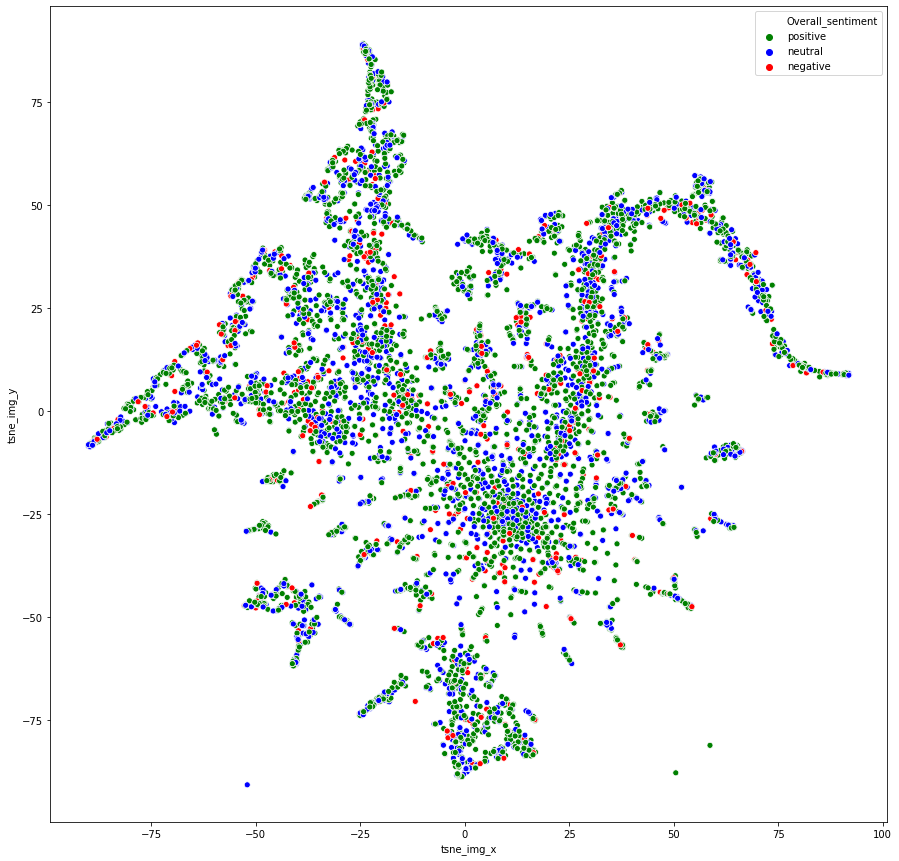

In [17]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_img_x", y="tsne_img_y",
    hue="Overall_sentiment",
    palette=["green", "blue", "red"],
    data=df_train,
    legend="full"
)

In [18]:
df_train["Sarcasm"].unique()

array(['general', 'not_sarcastic', 'twisted_meaning', 'very_twisted'],
      dtype=object)

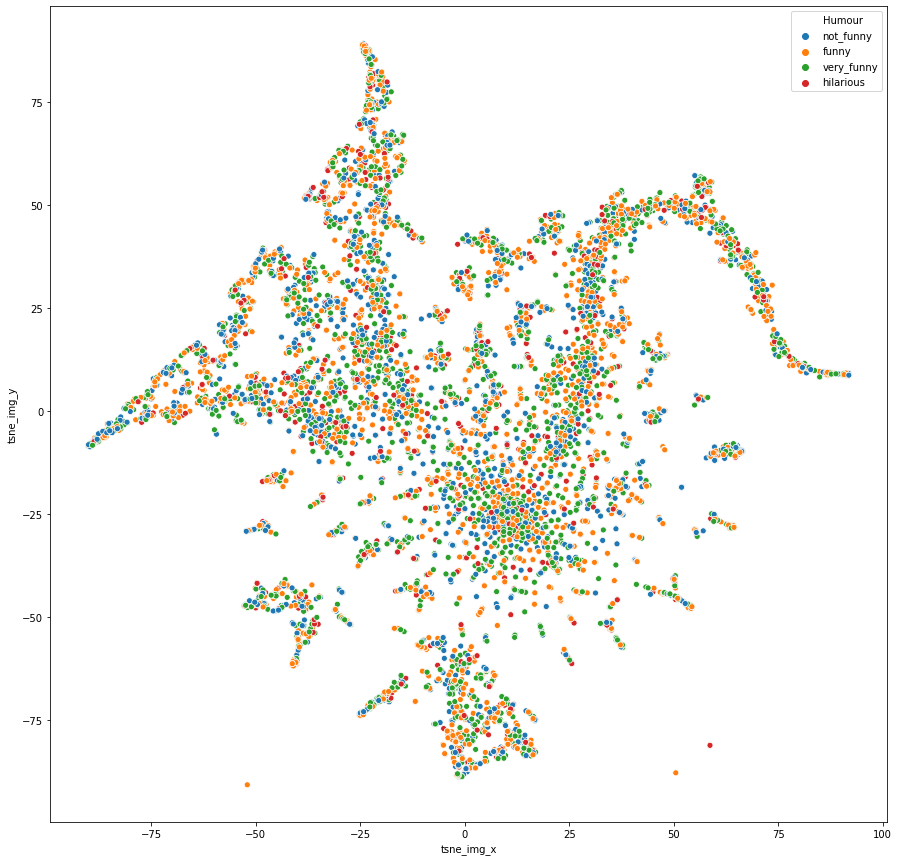

In [19]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_img_x", y="tsne_img_y",
    hue="Humour",
    data=df_train,
    legend="full",
    hue_order=["not_funny", "funny", "very_funny", "hilarious"]
)

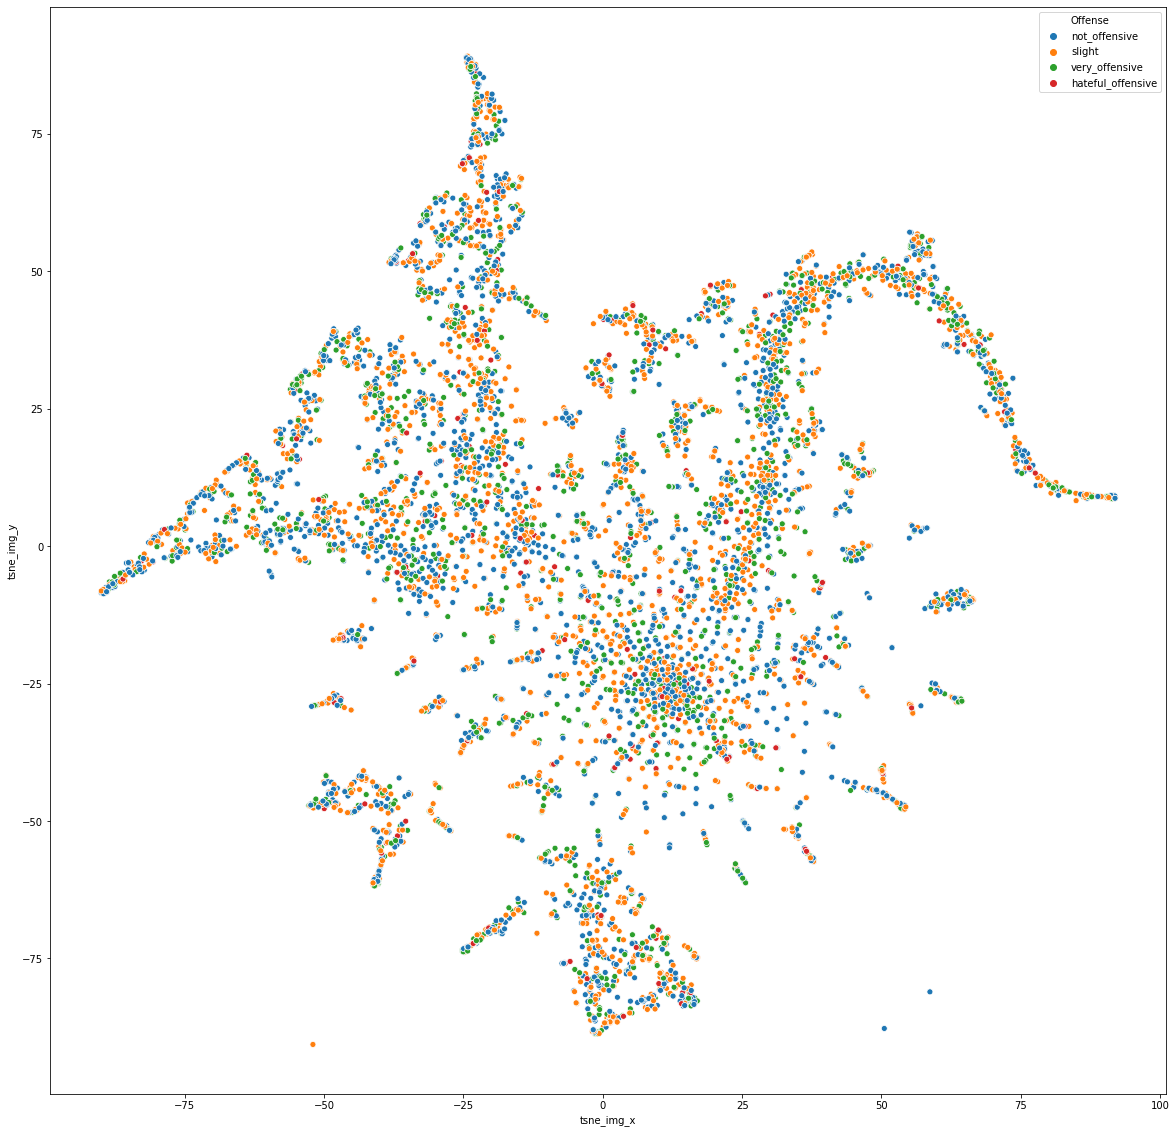

In [20]:
plt.figure(figsize=(20,20))
sns.scatterplot(
    x="tsne_img_x", y="tsne_img_y",
    hue="Offense",
    data=df_train,
    legend="full",
    hue_order=["not_offensive", "slight", "very_offensive", "hateful_offensive"]
)

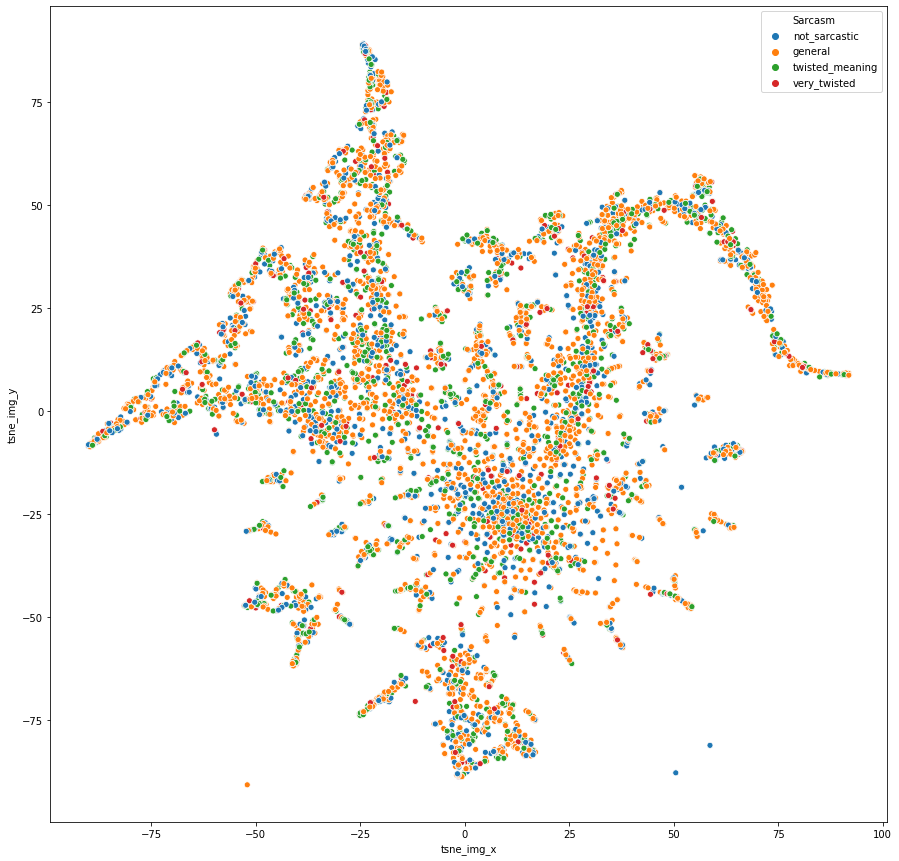

In [21]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_img_x", y="tsne_img_y",
    hue="Sarcasm",
    data=df_train,
    legend="full",
    hue_order=["not_sarcastic", "general",  "twisted_meaning", "very_twisted"]
)

### Text

In [22]:
sent_embeddings = load_pickle_file("data/features/use.pkl.train")

In [23]:
# For an unknown reason mapping numpy conversion to all tensors with list.map or during pickle save
# remove some of the entries so I use loop instead to prevent entries removal

img_ids = df_train["image_name"].apply(lambda x: os.path.splitext(x)[0])
sent_embed = []
for i, img_id in enumerate(img_ids):
    e = sent_embeddings[img_ids[i]].numpy()
    sent_embed.append(e)
sent_embed = np.array(sent_embed)

In [24]:
sent_embed.shape

(6999, 512)

In [35]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
sent_tsne = tsne.fit_transform(sent_embed)

In [36]:
df_train["tsne_sent_x"] = sent_tsne[:,0]
df_train["tsne_sent_y"] = sent_tsne[:,1]

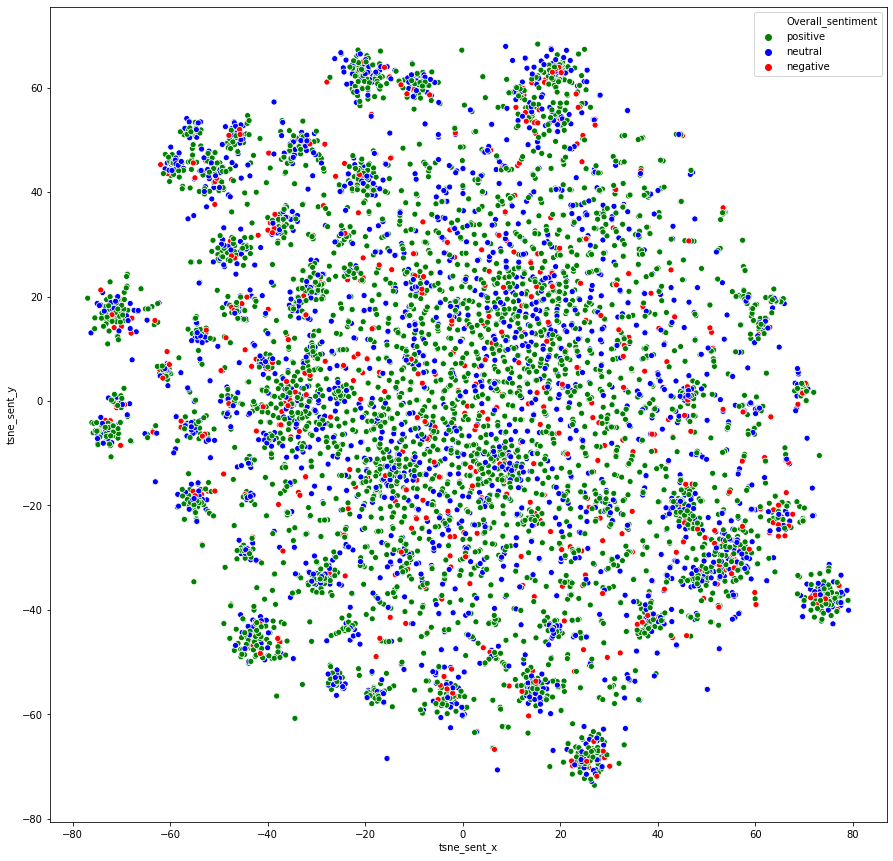

In [37]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_sent_x", y="tsne_sent_y",
    hue="Overall_sentiment",
    palette=["green", "blue", "red"],
    data=df_train,
    legend="full"
)

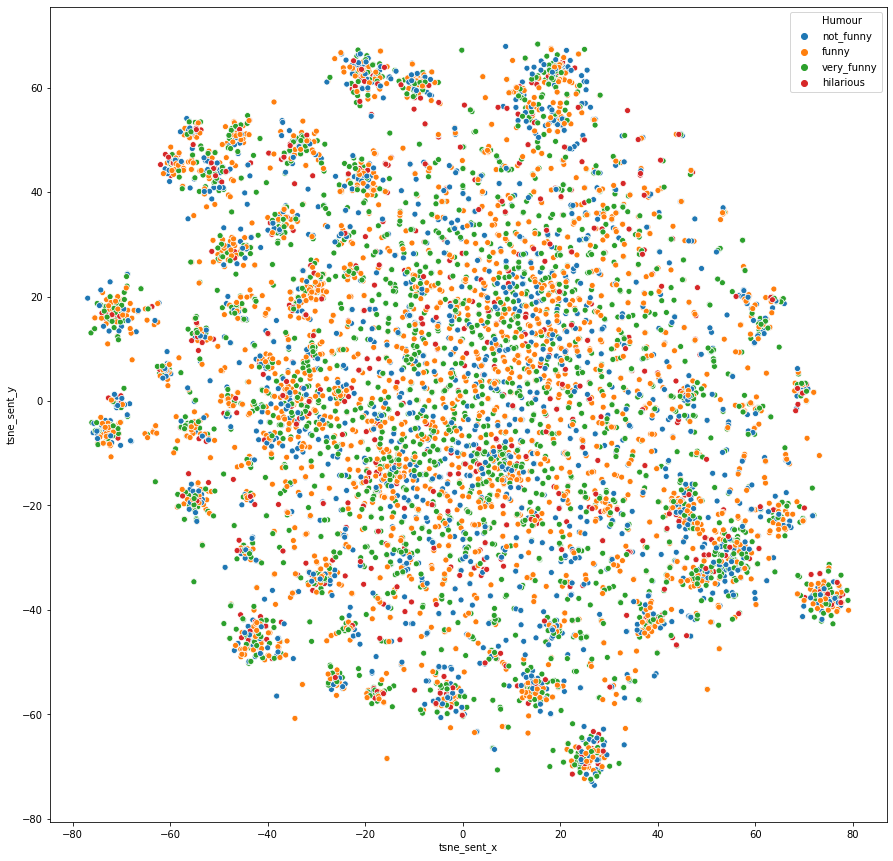

In [38]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_sent_x", y="tsne_sent_y",
    hue="Humour",
    data=df_train,
    legend="full",
    hue_order=["not_funny", "funny", "very_funny", "hilarious"]
)

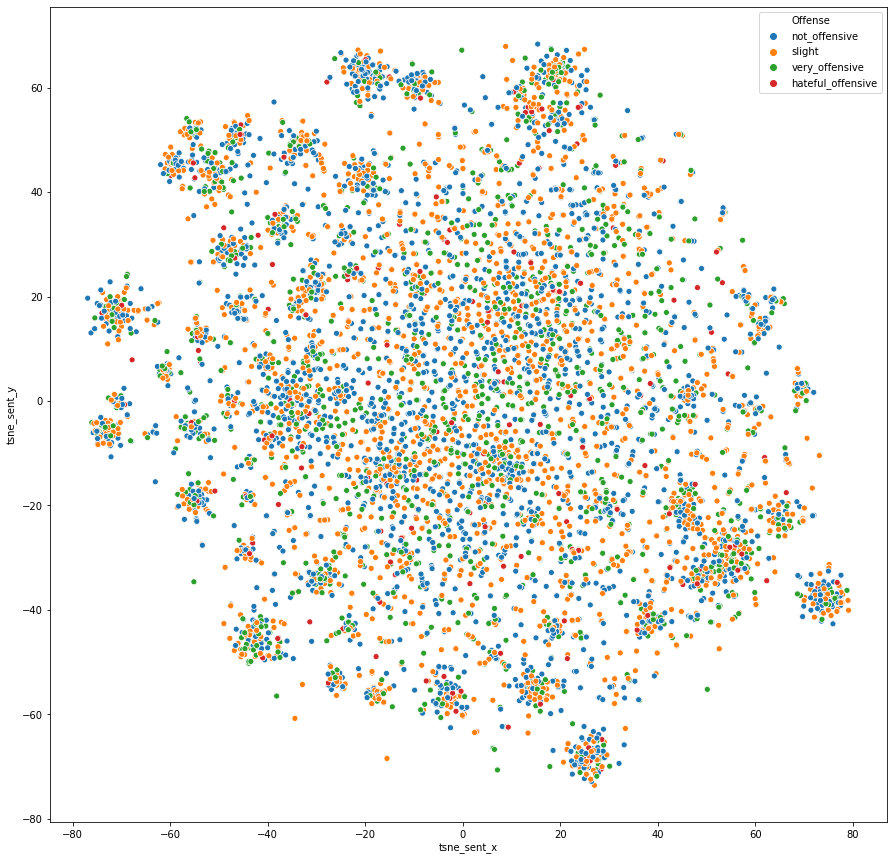

In [39]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_sent_x", y="tsne_sent_y",
    hue="Offense",
    data=df_train,
    legend="full",
    hue_order=["not_offensive", "slight", "very_offensive", "hateful_offensive"]
)

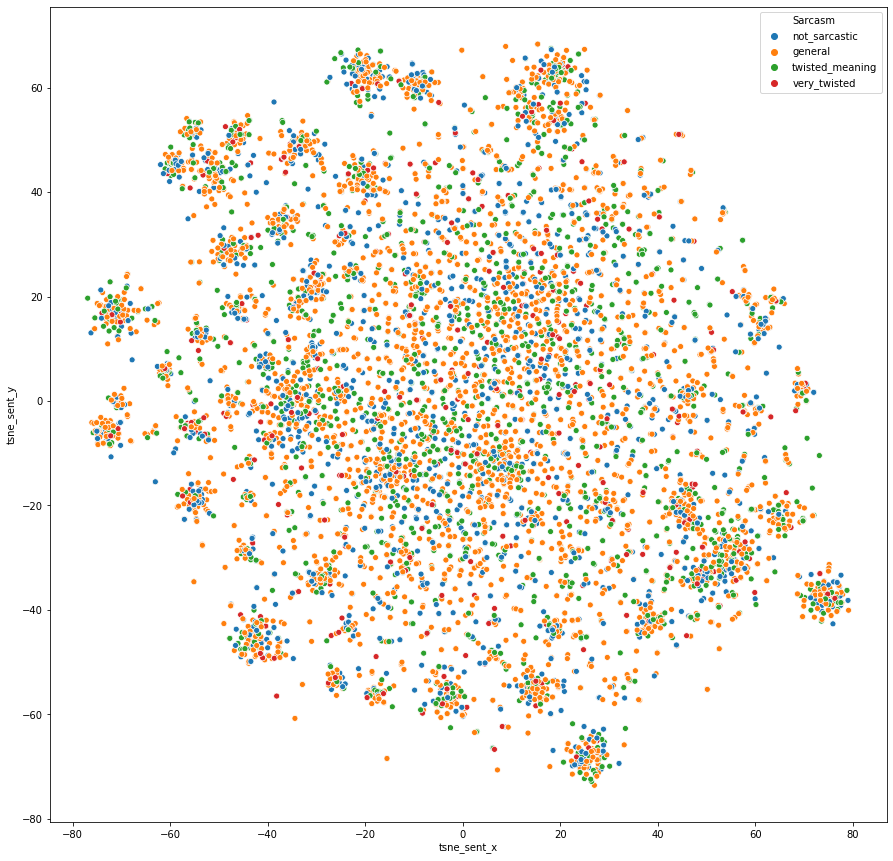

In [40]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_sent_x", y="tsne_sent_y",
    hue="Sarcasm",
    data=df_train,
    legend="full",
    hue_order=["not_sarcastic", "general",  "twisted_meaning", "very_twisted"]
)

## Fusion of text and image vectors

### CCA

In [31]:
from src.models.cca import compute_cca

In [32]:
cca_res = compute_cca(img_embed, sent_embed)

In [33]:
cca_res #TODO: interpretation of CCA + statistically significant sigmas + retrieval of the projected values

{'svd': (array([[-3.4497317e-02, -1.7118538e-02, -2.5360448e-02, ...,
          -8.9350278e-03, -4.9283139e-02,  2.0232769e-02],
         [ 1.0650723e-02, -4.8900280e-02, -2.1251910e-03, ...,
          -1.5289479e-02, -3.6140885e-02,  1.1305189e-02],
         [ 1.0889131e-02, -4.3091565e-02, -2.3652036e-02, ...,
          -1.5089043e-02, -1.5957452e-02, -5.7640404e-02],
         ...,
         [-5.7222461e-04,  2.9541531e-03, -2.8806005e-03, ...,
           8.4537691e-01, -1.6709147e-02, -4.5791585e-03],
         [ 2.6404601e-02, -1.2042199e-02,  7.8299791e-03, ...,
          -9.8068137e-03,  3.8701159e-01,  1.8741036e-02],
         [ 4.5864891e-02,  3.9109425e-03,  1.2874549e-02, ...,
          -4.3646228e-03,  1.8076727e-02,  4.4808206e-01]], dtype=float32),
  array([0.5849736 , 0.57417816, 0.5681676 , 0.5610891 , 0.55775094,
         0.5542935 , 0.54990625, 0.54763275, 0.54626673, 0.5432987 ,
         0.54086745, 0.53784704, 0.5365304 , 0.5346394 , 0.5342247 ,
         0.5332354 , 0.

### Concatenation

In [34]:
baseline_concat = np.concatenate((sent_embed, img_embed), axis=1)

## Task A: sentiment polarity detection
Classify memes as negative, neutral or positive. More details here: https://competitions.codalab.org/competitions/20629

## Task B: multi-label humour classification
Classify memes as offensive and/or humourous and/or sarcastic. If a meme belongs to neither of these class, it should be classified as other.
More details here: https://competitions.codalab.org/competitions/20629

## Task C: multi-label humour intensity classification
Classify the intensity of the class of humour listed in task B from 0 = "not at all" to 3 = "very".
More details here: https://competitions.codalab.org/competitions/20629